In [13]:
# find an example and plug in their serving stats

import sys
sys.path.insert(0,'/Users/jacobgollub/Desktop/college/research/pbp_explorations/scripts/sackmann')
import tennisGameProbability,tennisMatchProbability,tennisSetProbability,tennisTiebreakProbability
from tennisMatchProbability import matchProb
from helper_functions import enumerate_pbp_2, generate_df_2

f_ij_1 = .8
f_ji_1 = .8
f_ij_2 = .6
f_ji_2 = .6
sub_string = 'SSSS;SSSS;SSSS;SSSS;SSSS;RRRR;S;'

In [14]:
import pandas as pd

df = pd.DataFrame([sub_string])
df.columns = [['pbp']]
df = generate_df_2(df,columns=[],final_set_extend=0)

df shape:  (25, 13)


In [15]:



#a = enumerate_pbp_2(sub_string,columns=[])


# get match_probs
m_probs1, m_probs2 = [0]*len(df),[0]*len(df)

for i,row in df.iterrows():
    if row['server']==0:
        m_probs1[i] = matchProb(f_ij_1,1-f_ji_1,mv=int(row['sets_0']),mw=int(row['sets_1']),sv=int(row['games_0']), \
                                sw=int(row['games_1']),gv=int(row['points_0']),gw=int(row['points_1']))
        m_probs2[i] = matchProb(f_ij_2,1-f_ji_2,mv=int(row['sets_0']),mw=int(row['sets_1']),sv=int(row['games_0']), \
                                sw=int(row['games_1']),gv=int(row['points_0']),gw=int(row['points_1']))
    else:
        m_probs1[i] = 1 - matchProb(f_ji_1,1-f_ij_1,mv=int(row['sets_1']),mw=int(row['sets_0']),sv=int(row['games_1']), \
                                sw=int(row['games_0']),gv=int(row['points_1']),gw=int(row['points_0']))
        m_probs2[i] = 1 - matchProb(f_ji_2,1-f_ij_2,mv=int(row['sets_1']),mw=int(row['sets_0']),sv=int(row['games_1']), \
                                sw=int(row['games_0']),gv=int(row['points_1']),gw=int(row['points_0']))

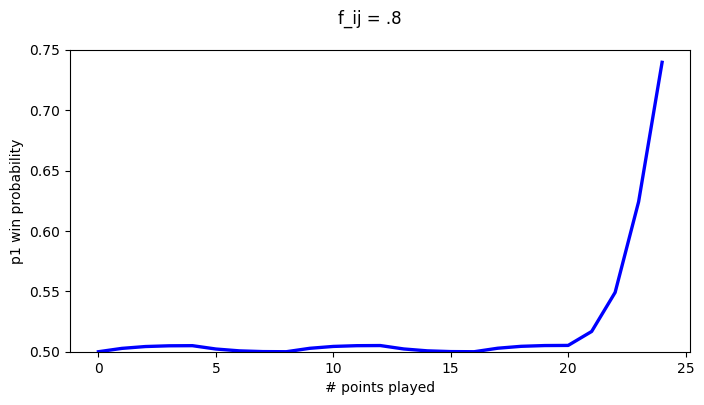

In [20]:
# graphically, try to compare different probabilities of different models
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#match1 = df_pred[df_pred['match_id']==1]
m1_probs = m_probs1
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(m1_probs)),m1_probs,'b-',linewidth=2.4)
fig.suptitle('f_ij = .8')
ax.set_ylabel('p1 win probability')
ax.set_xlabel('# points played')
ax.set_ylim([.5,.75])
#plt.savefig('gasquet_reister_9_6_all_features')
fig.show()

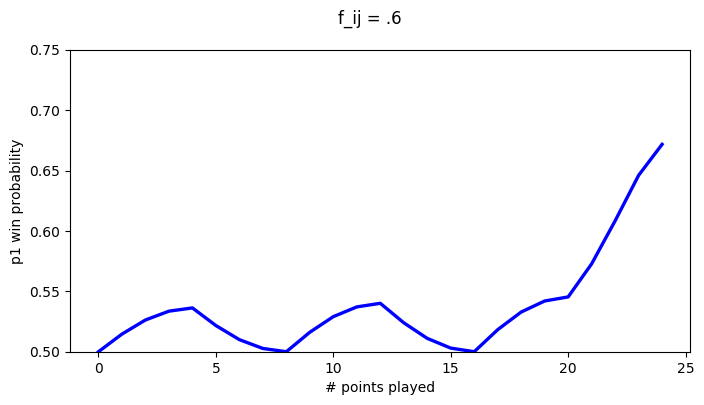

In [23]:
m2_probs = m_probs2
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(m2_probs)),m2_probs,'b-',linewidth=2.4)
fig.suptitle('f_ij = .6')
ax.set_ylabel('p1 win probability')
ax.set_xlabel('# points played')
ax.set_ylim([.5,.75])
fig.show()